# 1.- Importa las librerías requeridas.

In [1]:
import pandas as pd

# 2.- Lee el archivo CSV llamado empleadosRETO.csv y coloca los datos en un frame de Pandas llamado EmpleadosAttrition.

In [11]:
EmpleadosAttrition=pd.read_csv("reto.csv")
EmpleadosAttrition.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,1,997,4,Male,...,22,4,3,80,32,1,2,4,1,No
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,1,178,2,Male,...,20,4,4,80,7,0,3,2,0,No
2,21,Travel_Rarely,Sales,7 km,1,Marketing,1,1780,2,Male,...,13,3,2,80,1,3,3,0,1,Yes
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,1,1118,2,Male,...,19,3,4,80,18,4,3,6,4,No
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,1,582,2,Male,...,12,3,4,80,15,2,4,6,7,Yes


# 3.- Elimina las columnas que, con alta probabilidad (estimada por ti), no tienen relación alguna con la salida. Hay algunas columnas que contienen información que no ayuda a definir el desgaste de un empleado, tal es caso de las siguientes:
    a. EmployeeCount: número de empleados, todos tienen un 1
    b. EmployeeNumber: ID del empleado, el cual es único para cada empleado
    c. Over18: mayores de edad, todos dicen “Y”
    d. StandardHours: horas de trabajo, todos tienen “80”

In [12]:
EmpleadosAttrition = EmpleadosAttrition.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])
EmpleadosAttrition.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'HiringDate', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition'],
      dtype='object')

# 4.- Analiza la información proporcionada, si detectaste que no se cuenta con los años que el empelado lleva en la compañía y parece ser un buen dato. Dicha cantidad se puede calcular con la fecha de contratación ‘HiringDate’.

# 5.-Crea una columna llamada Year y obtén el año de contratación del empleado a partir de su fecha ‘HiringDate’. No se te olvide que debe ser un entero.

In [17]:
EmpleadosAttrition["HiringDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: HiringDate
Non-Null Count  Dtype         
--------------  -----         
399 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 KB


In [15]:
EmpleadosAttrition["HiringDate"] = pd.to_datetime(EmpleadosAttrition["HiringDate"], errors="coerce")
EmpleadosAttrition["Year"] = EmpleadosAttrition["HiringDate"].dt.year.astype("Int64")
EmpleadosAttrition.head()


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,Year
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,4,Male,3,4,...,22,4,3,32,1,2,4,1,No,2013
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,2,Male,3,2,...,20,4,4,7,0,3,2,0,No,2015
2,21,Travel_Rarely,Sales,7 km,1,Marketing,2,Male,3,1,...,13,3,2,1,3,3,0,1,Yes,2017
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,2,Male,3,3,...,19,3,4,18,4,3,6,4,No,2010
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,2,Male,3,3,...,12,3,4,15,2,4,6,7,Yes,2011


In [19]:
EmpleadosAttrition["Year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Year
Non-Null Count  Dtype
--------------  -----
399 non-null    Int64
dtypes: Int64(1)
memory usage: 3.6 KB


# 6.- Crea una columna llamada YearsAtCompany que contenga los años que el empleado lleva en la compañía hasta el año 2018. Para su cálculo, usa la variable Year que acabas de crear.

In [20]:
EmpleadosAttrition["YearsAtCompany"] = (2018 - EmpleadosAttrition["Year"]).astype("Int64")
EmpleadosAttrition.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,Year,YearsAtCompany
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,4,Male,3,4,...,4,3,32,1,2,4,1,No,2013,5
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,2,Male,3,2,...,4,4,7,0,3,2,0,No,2015,3
2,21,Travel_Rarely,Sales,7 km,1,Marketing,2,Male,3,1,...,3,2,1,3,3,0,1,Yes,2017,1
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,2,Male,3,3,...,3,4,18,4,3,6,4,No,2010,8
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,2,Male,3,3,...,3,4,15,2,4,6,7,Yes,2011,7


# 7.- La DistanceFromHome está dada en kilómetros, pero tiene las letras “km” al final y así no puede ser entera.
# 8- Renombra la variable DistanceFromHome a DistanceFromHome_km.
# 9.- Crea una nueva variable DistanceFromHome que sea entera, es decir, solo con números.

In [21]:
EmpleadosAttrition["DistanceFromHome"]

0       1 km
1       6 km
2       7 km
3       7 km
4      15 km
       ...  
395    14 km
396    20 km
397    11 km
398     4 km
399    14 km
Name: DistanceFromHome, Length: 400, dtype: object

In [23]:
EmpleadosAttrition=EmpleadosAttrition.rename(columns={"DistanceFromHome":"DistanceFromHome_km"})
EmpleadosAttrition.head()

,Age,BusinessTravel,Department,DistanceFromHome_km,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,Year,YearsAtCompany
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,4,Male,3,4,...,4,3,32,1,2,4,1,No,2013,5
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,2,Male,3,2,...,4,4,7,0,3,2,0,No,2015,3
2,21,Travel_Rarely,Sales,7 km,1,Marketing,2,Male,3,1,...,3,2,1,3,3,0,1,Yes,2017,1
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,2,Male,3,3,...,3,4,18,4,3,6,4,No,2010,8
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,2,Male,3,3,...,3,4,15,2,4,6,7,Yes,2011,7


In [24]:
EmpleadosAttrition["DistanceFromHome"] = EmpleadosAttrition["DistanceFromHome_km"].str.replace("km", "", regex=False).str.strip()
EmpleadosAttrition["DistanceFromHome"] = pd.to_numeric(EmpleadosAttrition["DistanceFromHome"], errors="coerce").astype("Int64")
print(EmpleadosAttrition["DistanceFromHome"].head())
print(EmpleadosAttrition["DistanceFromHome"].info())


0     1
1     6
2     7
3     7
4    15
Name: DistanceFromHome, dtype: Int64
<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: DistanceFromHome
Non-Null Count  Dtype
--------------  -----
400 non-null    Int64
dtypes: Int64(1)
memory usage: 3.6 KB
None


# 10.- Borra las columnas Year, HiringDate y DistanceFromHome_km debido a que ya no son útiles.

In [26]:
EmpleadosAttrition = EmpleadosAttrition.drop(columns=["Year", "HiringDate", "DistanceFromHome_km"])
EmpleadosAttrition.columns

Index(['Age', 'BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'Attrition', 'YearsAtCompany',
       'DistanceFromHome'],
      dtype='object')

# 11.- Aprovechando los ajustes que se están haciendo, la empresa desea saber si todos los departamentos tienen un ingreso promedio similar. Genera una nuevo frame llamado SueldoPromedioDepto que contenga el MonthlyIncome promedio por departamento de los empleados y colócalo en una variable llamada SueldoPromedio. Esta tabla solo es informativa, no la vas a utilizar en el set de datos que estás construyendo.

In [28]:
SueldoPromedioDepto=EmpleadosAttrition.groupby("Department")["MonthlyIncome"].mean().reset_index()
SueldoPromedioDepto

,Department,MonthlyIncome
0,Human Resources,6239.888889
1,Research & Development,6804.149813
2,Sales,7188.250000


# 12.- La variable MonthlyIncome tiene un valor numérico muy grande comparada con las otras variables. Escala dicha variable para que tenga un valor entre 0 y 1. 

In [29]:
EmpleadosAttrition["MonthlyIncome"].unique()

array([17399,  4941,  2679, 10445, 13610, 10333,  4775,  5368, 10855,
        5071,  2406, 10976,  2313, 10609, 18789,  9924,  4627,  5406,
       19833, 14852,  5470,  4035,  6091,  1601,  6132,  6062,  1009,
        2168, 14336,  4422,  3131,  2342, 17169,  5309,  2619,  5660,
        9380, 11103,  9525,  7880, 10686,  4025, 12504,  5488,  6172,
       10453,  5745,  4440,  7847,  2326,  4152, 17123, 19392,  6811,
        6244,  3978,  2404, 16124, 18665,  2858, 15992,  8628,  6586,
        4342, 10932,  7083,  9985, 10793,  2782,  5003,  5399,  4682,
        2571,  2028,  2911,  2325,  2794,  7779,  4071,  2319,  2514,
       19973,  6347, 13464,  2398,  4345, 17650,  4556,  8943,  5482,
        5343, 17444,  5677,  8380,  5714,  2691, 11416,  3633,  8834,
        7547,  3068,  2132,  5376,  7861,  3072, 10650,  6288,  3540,
       14275,  5301,  1081,  3833, 19701,  9725,  4936, 17068,  9980,
        5228,  2942,  4900, 14118,  1790,  7005,  2440,  2143,  7918,
       13206,  8633,

In [40]:
EmpleadosAttrition.iloc[:,12:13]

,MonthlyIncome
0,17399
1,4941
2,2679
3,10445
4,13610
...,...
395,2436
396,4559
397,12185
398,3306


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
EmpleadosAttrition["MonthlyIncome"] = scaler.fit_transform(EmpleadosAttrition[["MonthlyIncome"]])

In [42]:
EmpleadosAttrition.iloc[:,12:13]

,MonthlyIncome
0,0.864269
1,0.207340
2,0.088062
3,0.497574
4,0.664470
...,...
395,0.075248
396,0.187197
397,0.589327
398,0.121124


# 13.- Todo parece indicar que las variables categóricas que quedan sí son importantes para obtener la variable de salida. Convierte todas las variables categóricas que quedan a numéricas:
    a) BusinessTravel

    b) Department

    c) EducationField

    d) Gender

    e) JobRole

    f) MaritalStatus

    g) Attrition

In [67]:
columnas = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus","Attrition"]
EmpleadosAttrition=pd.get_dummies(EmpleadosAttrition, columns=columnas, dummy_na=False, drop_first=True).apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [68]:
EmpleadosAttrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                400 non-null    int64  
 1   Education                          400 non-null    int64  
 2   EnvironmentSatisfaction            400 non-null    int64  
 3   JobInvolvement                     400 non-null    int64  
 4   JobLevel                           400 non-null    int64  
 5   JobSatisfaction                    400 non-null    int64  
 6   MonthlyIncome                      400 non-null    float64
 7   NumCompaniesWorked                 400 non-null    int64  
 8   OverTime                           400 non-null    object 
 9   PercentSalaryHike                  400 non-null    int64  
 10  PerformanceRating                  400 non-null    int64  
 11  RelationshipSatisfaction           400 non-null    int64  

In [69]:
EmpleadosAttrition.head()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes
0,50,2,4,3,4,4,0.864269,9,No,22,...,0,0,0,1,0,0,0,0,0,0
1,36,2,2,3,2,2,0.207340,6,No,20,...,0,0,1,0,0,0,0,0,0,0
2,21,1,2,3,1,2,0.088062,1,No,13,...,0,0,0,0,0,0,1,0,1,1
3,52,4,2,3,3,2,0.497574,7,No,19,...,0,0,0,0,0,0,0,0,1,0
4,33,1,2,3,3,3,0.664470,7,Yes,12,...,0,1,0,0,0,0,0,1,0,1


# 14. Ahora debes hacer la evaluación de las variables para quedarte con las mejores. Calcula la correlación lineal de cada una de las variables con respecto al Attrition.

In [71]:
print(EmpleadosAttrition.select_dtypes(include=['int64', 'float64', 'Int64']).corr()['Attrition_Yes'].drop('Attrition_Yes').sort_values(ascending=False))

MaritalStatus_Single                 0.205849
JobRole_Sales Representative         0.191294
EducationField_Technical Degree      0.129104
JobRole_Laboratory Technician        0.125264
Department_Sales                     0.066116
DistanceFromHome                     0.052732
BusinessTravel_Travel_Rarely         0.042755
BusinessTravel_Travel_Frequently     0.035387
JobRole_Human Resources              0.032714
EducationField_Marketing             0.016768
JobRole_Research Scientist           0.007977
JobRole_Sales Executive             -0.003115
EducationField_Other                -0.004275
PerformanceRating                   -0.006471
NumCompaniesWorked                  -0.009082
WorkLifeBalance                     -0.021723
EducationField_Life Sciences        -0.027457
Gender_Male                         -0.028839
RelationshipSatisfaction            -0.030945
JobRole_Manufacturing Director      -0.042404
EducationField_Medical              -0.054144
Education                         

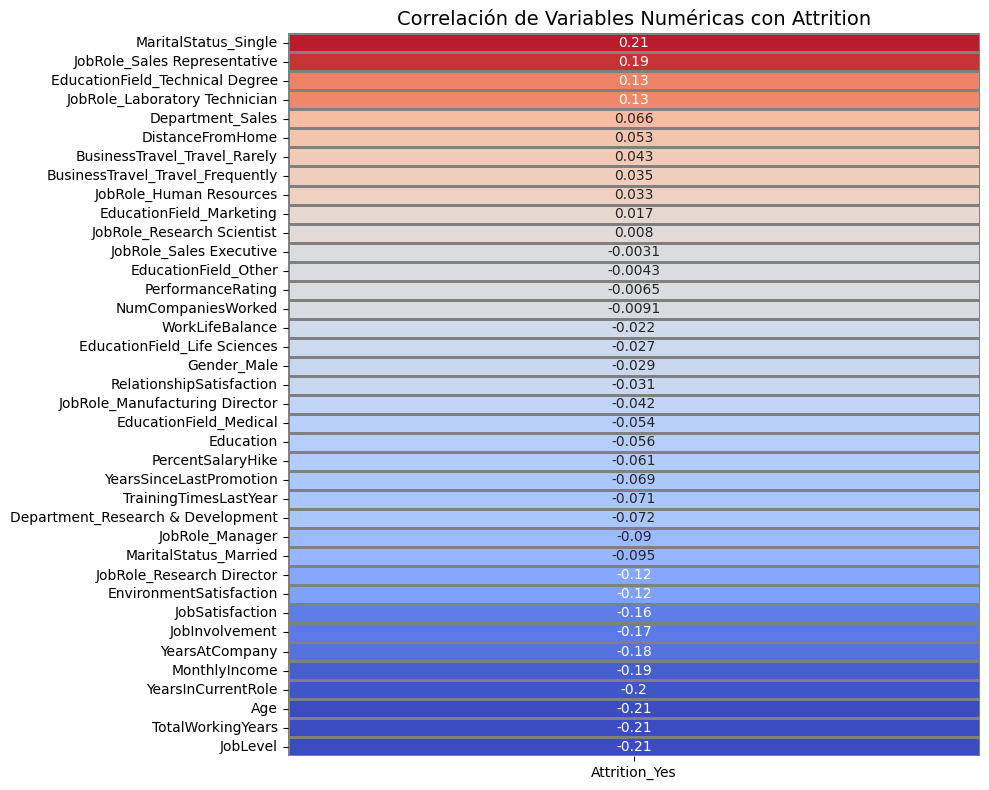

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlaciones = EmpleadosAttrition.select_dtypes(include=['int64', 'float64', 'Int64']).corr()['Attrition_Yes'].drop('Attrition_Yes').sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', center=0, cbar=False, linewidths=1, linecolor='gray')
plt.title('Correlación de Variables Numéricas con Attrition', fontsize=14)
plt.tight_layout()
plt.show()

# 15. Selecciona solo aquellas variables que tengan una correlación mayor o igual a 0.1, dejándolas en otro frame llamado EmpleadosAttritionFinal. No olvides mantener la variable de salidaAttrition; esto es equivalente a borrar las que no cumplen con el límite.

In [79]:
relevantes = correlaciones[correlaciones.abs() >= 0.1].index.tolist()
if 'Attrition_Yes' not in relevantes:
    relevantes.append('Attrition_Yes')
EmpleadosAttritionFinal = EmpleadosAttrition[relevantes].copy()
EmpleadosAttritionFinal.columns

Index(['MaritalStatus_Single', 'JobRole_Sales Representative',
       'EducationField_Technical Degree', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'MonthlyIncome',
       'YearsInCurrentRole', 'Age', 'TotalWorkingYears', 'JobLevel',
       'Attrition_Yes'],
      dtype='object')

In [80]:
EmpleadosAttritionFinal

,MaritalStatus_Single,JobRole_Sales Representative,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Research Director,EnvironmentSatisfaction,JobSatisfaction,JobInvolvement,YearsAtCompany,MonthlyIncome,YearsInCurrentRole,Age,TotalWorkingYears,JobLevel,Attrition_Yes
0,0,0,0,0,1,4,4,3,5,0.864269,4,50,32,4,0
1,0,0,0,0,0,2,2,3,3,0.207340,2,36,7,2,0
2,1,1,0,0,0,2,2,3,1,0.088062,0,21,1,1,1
3,1,0,0,0,0,2,2,3,8,0.497574,6,52,18,3,0
4,0,0,0,0,0,2,3,3,7,0.664470,6,33,15,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,1,0,3,4,3,5,0.075248,4,33,8,1,1
396,0,0,0,0,0,2,3,1,2,0.187197,2,31,4,2,1
397,0,0,0,0,1,2,4,3,10,0.589327,8,37,10,3,0
398,0,0,0,1,0,4,3,3,0,0.121124,0,38,7,1,0


# 16. Crea una nueva variable llamada EmpleadosAttritionPCA formada por los componentes principales del frame EmpleadosAttritionFinal. Recuerda que el resultado del proceso PCA es un numpy array, por lo que, para hacer referencia a una columna, por ejemplo, la 0, puedes usar la instrucción EmpleadosAttritionPCA[:,0]).

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

X = EmpleadosAttritionFinal.drop(columns='Attrition_Yes')
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputado)
pca = PCA()
EmpleadosAttritionPCA = pca.fit_transform(X_scaled)






In [88]:
EmpleadosAttritionPCA[:,0]

array([ 4.00185045e+00, -9.52855746e-01, -3.44452875e+00,  1.51658813e+00,
        1.13083561e+00,  3.24018079e+00, -1.65419369e+00, -6.01879017e-01,
        1.79264952e+00, -1.15657589e+00, -2.08279056e+00,  1.43672283e+00,
       -1.96946044e+00,  1.13628672e+00,  3.44500406e+00,  5.28516820e-01,
       -1.14382613e+00,  1.01519086e+00,  3.84613582e+00,  3.77991496e+00,
       -3.29774246e-01, -6.22643435e-01, -6.78352527e-01, -3.23203856e+00,
       -4.49407492e-01, -4.78905162e-01, -3.01276185e+00, -1.56294143e+00,
        4.80280788e+00, -5.61954209e-01, -1.12874774e+00, -1.21027789e+00,
        5.51144126e+00, -4.15262525e-01, -1.95737057e+00,  2.79685876e-01,
        1.62287694e-01,  3.10541861e+00, -2.86579384e-01,  4.71059911e-01,
        1.37800788e+00, -1.35283942e+00,  6.55475340e-01, -6.77858992e-01,
       -6.48989711e-02,  3.27401183e+00, -7.33564660e-01,  1.08268340e+00,
        6.36005733e-01, -1.64213494e+00,  1.09440797e-01,  3.27801189e+00,
        4.13099033e+00, -

# 17. Agrega el mínimo número de Componentes Principales en columnas del frame EmpleadosAttritionPCA que logren explicar el 80% de la varianza, al frame EmpleadosAttritionFinal. Puedes usar la instrucción assign, columna por columna, llamando a cada unaC0, C1, etc., hasta las que vayas a agregar.

In [90]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = EmpleadosAttritionFinal.drop(columns='Attrition_Yes')
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputado)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
n_componentes = np.argmax(varianza_acumulada >= 0.80) + 1
print(f"Se necesitan {n_componentes} componentes para explicar el 80% de la varianza.")
columnas_pca = {f'C{i}': EmpleadosAttritionPCA[:, i] for i in range(n_componentes)}
df_componentes = pd.DataFrame(columnas_pca)
EmpleadosAttritionFinal = EmpleadosAttritionFinal.assign(**df_componentes)



Se necesitan 8 componentes para explicar el 80% de la varianza.


In [91]:
EmpleadosAttritionFinal.head()

,MaritalStatus_Single,JobRole_Sales Representative,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Research Director,EnvironmentSatisfaction,JobSatisfaction,JobInvolvement,YearsAtCompany,MonthlyIncome,...,JobLevel,Attrition_Yes,C0,C1,C2,C3,C4,C5,C6,C7
0,0,0,0,0,1,4,4,3,5,0.864269,...,4,0,4.001850,-1.542374,-1.184888,0.656329,-0.229374,1.221109,0.475730,2.013691
1,0,0,0,0,0,2,2,3,3,0.207340,...,2,0,-0.952856,-0.430851,-0.427687,-0.281392,-0.879151,-0.054848,0.086333,0.015002
2,1,1,0,0,0,2,2,3,1,0.088062,...,1,1,-3.444529,-2.321882,2.514256,-1.498724,0.300770,0.361211,-0.782298,-0.147066
3,1,0,0,0,0,2,2,3,8,0.497574,...,3,0,1.516588,-1.181730,-0.207749,0.008148,0.096811,-0.218879,-0.762831,-1.674696
4,0,0,0,0,0,2,3,3,7,0.664470,...,3,1,1.130836,0.043097,0.136284,0.062704,-0.537215,0.241918,-0.445467,0.290184


# 18. Guarda el set de datos que has formado y que tienes en EmpleadosAttritionFinal en un archivo CSV llamado EmpleadosAttritionFinal.csv. Las últimas columnas que colocaste quedarán después de la variable Attrition, lo cual no importa, pero si gustas lo puedes arreglar antes de escribir el archivo.

In [92]:
EmpleadosAttritionFinal.to_csv("EmpleadosAttritionFinal.csv")